In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 9,6
import seaborn as sb
sb.set()

In [3]:
import json
import requests
import datetime as dt

url = 'https://api.binance.com/api/v3/klines'
symbol = 'BTCUSDT'
interval = '1d'
start = str(int(dt.datetime(2017,8,16).timestamp()*1000))
end = str(int(dt.datetime(2020,1,1).timestamp()*1000))
par = {'symbol': symbol, 'interval': interval, 'startTime': start, 'endTime': end, 'limit': 1000}
btc = pd.DataFrame(json.loads(requests.get(url, params= par).text))
btc.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume','close_time', 'qav', 'num_trades','taker_base_vol', 'taker_quote_vol', 'ignore']
btc.drop(columns=['open', 'high', 'low', 'volume', 'close_time', 'qav', 'num_trades','taker_base_vol', 'taker_quote_vol', 'ignore'], inplace = True) #we will only use close price
btc.index = [dt.datetime.fromtimestamp(x/1000.0) for x in btc.datetime]
btc=btc.astype(float)
btc.head()

,datetime,close
2017-08-16 20:00:00,1.502928e+12,4285.08
2017-08-17 20:00:00,1.503014e+12,4108.37
2017-08-18 20:00:00,1.503101e+12,4139.98
2017-08-19 20:00:00,1.503187e+12,4086.29
2017-08-20 20:00:00,1.503274e+12,4016.00


adding all the data available (api only let me load max 1000 obs at once)

In [4]:
start = str(int(dt.datetime(2020,1,1).timestamp()*1000))
end = str(int(dt.datetime(2022,1,1).timestamp()*1000))
par = {'symbol': symbol, 'interval': interval, 'startTime': start, 'endTime': end, 'limit': 1000}
btc2 = pd.DataFrame(json.loads(requests.get(url, params= par).text))
btc2.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume','close_time', 'qav', 'num_trades','taker_base_vol', 'taker_quote_vol', 'ignore']
btc2.drop(columns=['open', 'high', 'low', 'volume', 'close_time', 'qav', 'num_trades','taker_base_vol', 'taker_quote_vol', 'ignore'], inplace = True) #we will only use close price
btc2.index = [dt.datetime.fromtimestamp(x/1000.0) for x in btc2.datetime]
btc2=btc2.astype(float)
btc2.head()

,datetime,close
2020-01-01 21:00:00,1.577923e+12,6965.71
2020-01-02 21:00:00,1.578010e+12,7344.96
2020-01-03 21:00:00,1.578096e+12,7354.11
2020-01-04 21:00:00,1.578182e+12,7358.75
2020-01-05 21:00:00,1.578269e+12,7758.00


In [5]:
start = str(int(dt.datetime(2022,1,1).timestamp()*1000))
end = str(int(dt.datetime(2024,1,1).timestamp()*1000))
par = {'symbol': symbol, 'interval': interval, 'startTime': start, 'endTime': end, 'limit': 1000}
btc3 = pd.DataFrame(json.loads(requests.get(url, params= par).text))
btc3.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume','close_time', 'qav', 'num_trades','taker_base_vol', 'taker_quote_vol', 'ignore']
btc3.drop(columns=['open', 'high', 'low', 'volume', 'close_time', 'qav', 'num_trades','taker_base_vol', 'taker_quote_vol', 'ignore'], inplace = True) #we will only use close price
btc3.index = [dt.datetime.fromtimestamp(x/1000.0) for x in btc3.datetime]
btc3=btc3.astype(float)
btc3.head()

,datetime,close
2022-01-01 21:00:00,1.641082e+12,47286.18
2022-01-02 21:00:00,1.641168e+12,46446.10
2022-01-03 21:00:00,1.641254e+12,45832.01
2022-01-04 21:00:00,1.641341e+12,43451.13
2022-01-05 21:00:00,1.641427e+12,43082.31


In [6]:
btc = btc.append(btc2)
btc = btc.append(btc3)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11148\2545265688.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  btc = btc.append(btc2)
C:\Users\Acer\AppData\Local\Temp\ipykernel_11148\2545265688.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  btc = btc.append(btc3)


closing prices difference (return)

In [7]:
btc_return = round(np.log(btc.close).diff() * 100, 2)
btc_return.dropna(inplace = True)
btc_return.head()

2017-08-17 20:00:00   -4.21
2017-08-18 20:00:00    0.77
2017-08-19 20:00:00   -1.31
2017-08-20 20:00:00   -1.74
2017-08-21 20:00:00    0.60
Name: close, dtype: float64

<AxesSubplot:>

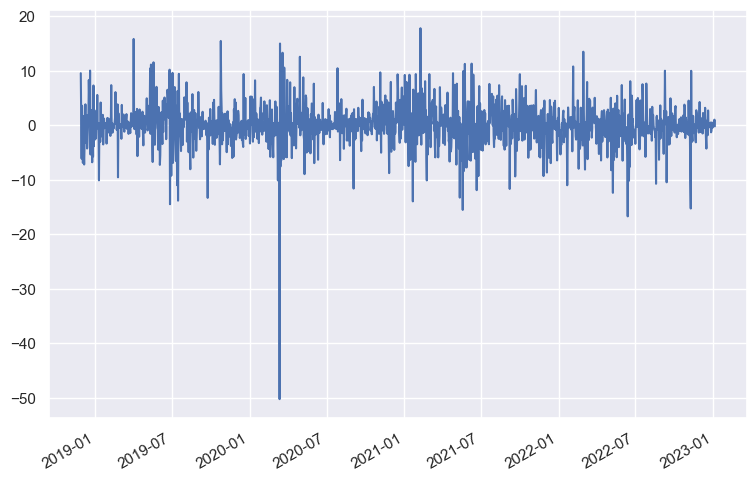

In [8]:
btc_return[-1500:].plot()

estadísticos

In [9]:
btc_return.describe()

count    1967.000000
mean        0.069532
std         4.133520
min       -50.260000
25%        -1.590000
50%         0.110000
75%         1.860000
max        20.300000
Name: close, dtype: float64

this look kinda weird to run regression lol

In [10]:
from scipy import stats

In [11]:
n, minmax, mean, var, skew, kurt = stats.describe(btc_return)
mini, maxi = minmax
std = var**0.5

In [12]:
print(minmax)
print(std)

(-50.26, 20.3)
4.133520416352246


for comparasion, i'll generate random numbers that DO follow a normal distribution

In [13]:
from scipy.stats import norm

In [14]:
x = norm.rvs(mean, std, n)

In [15]:
stats.describe(x)

DescribeResult(nobs=1967, minmax=(-13.835886519972957, 14.135154982716228), mean=0.06402912254418625, variance=17.137118973204167, skewness=-0.0037364232558845085, kurtosis=-0.044717433687597286)

(array([  2.,  13.,  27.,  77., 148., 236., 323., 350., 316., 224., 145.,
         65.,  32.,   6.,   3.]),
 array([-13.83588652, -11.97115042, -10.10641432,  -8.24167822,
         -6.37694212,  -4.51220602,  -2.64746992,  -0.78273382,
          1.08200228,   2.94673838,   4.81147448,   6.67621058,
          8.54094668,  10.40568278,  12.27041888,  14.13515498]),
 <BarContainer object of 15 artists>)

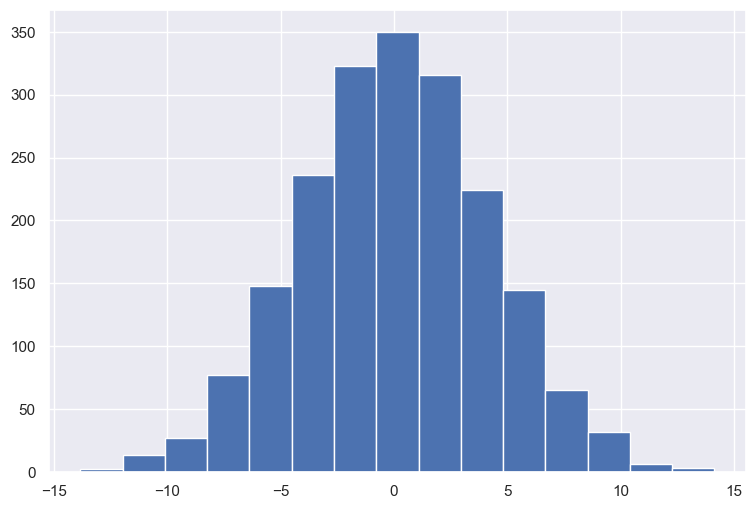

In [16]:
plt.hist(x, bins=15)

now, our data

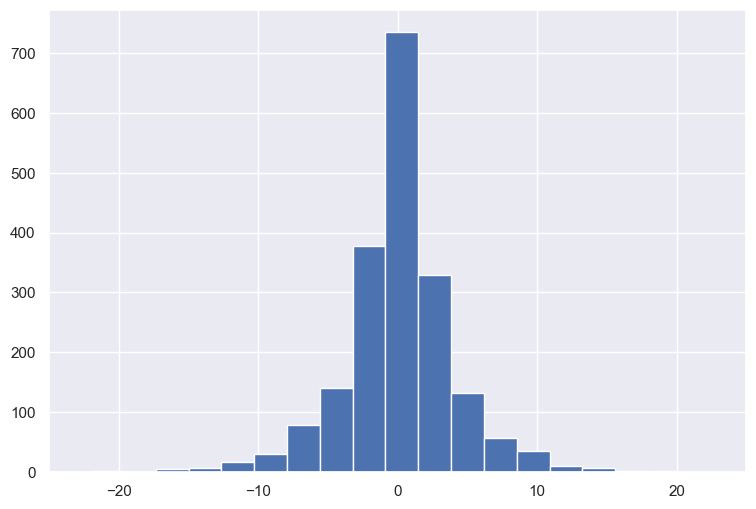

In [17]:
plt.hist(btc_return, bins=30)
plt.xlim(-25,25);

looks like isnt a normal distrib

testing if price change is normally distributed
-using null hypothesis H0: the sample is drawn from a population where the underlying kurtosis is that of a normally distributed variable

In [18]:
x_test = stats.kurtosistest(x)
btc_test = stats.kurtosistest(btc_return)
print(f'{"      Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"btc: {btc_test[0]:13.2f}{btc_test[1]:16.4f}")

      Test statistic        p-value
     ------------------------------
x:            -0.33          0.7383
btc:         20.40          0.0000


p-value isn't 0 (is just so smol) -> in the standar case we using 95% conf level, then p-value < alpha -> the alt hypothesis does give us significantly data to reject null hypothesis,

i.e., our data (eth) doesnt follow a normal distribution

plotting an histogram of price changes with normal curve overlay (on our data)

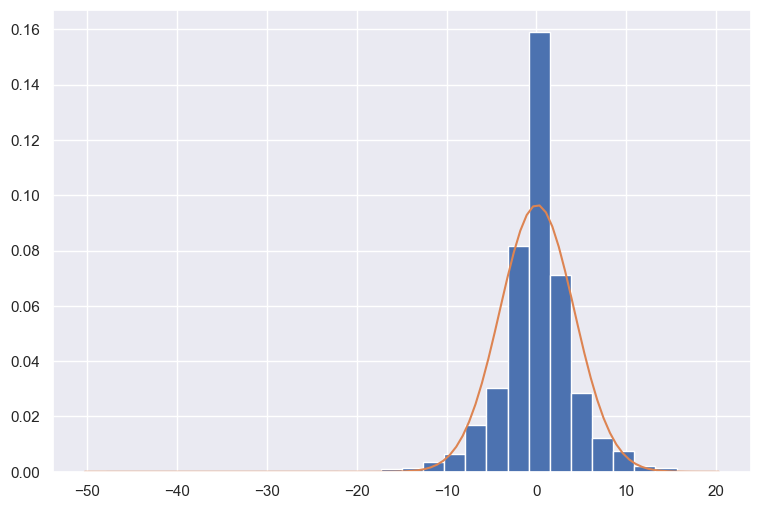

In [19]:
plt.hist(btc_return, bins=30, edgecolor='w', density=True)
data = np.linspace(mini, maxi, 100)
plt.plot(data, norm.pdf(data, mean, std))

comparing with x (normal distr created data)

(-20.0, 20.0)

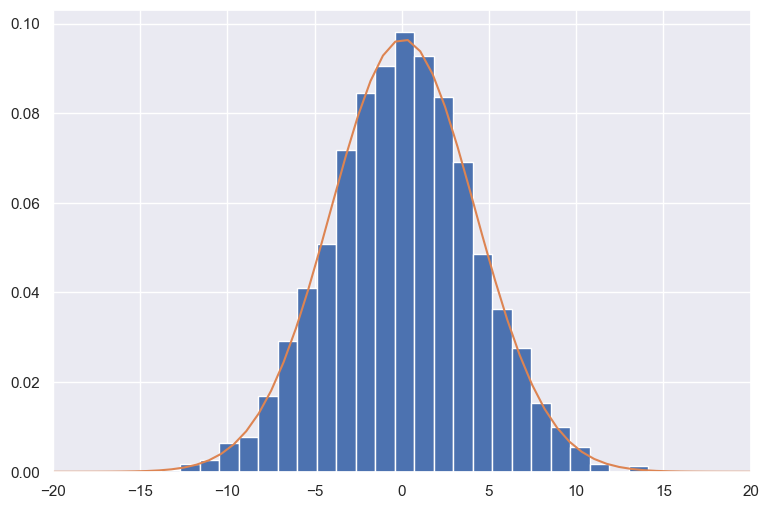

In [20]:
plt.hist(x, bins=25, density=True)
b = np.linspace(mini, maxi, 100)
plt.plot(b, stats.norm.pdf(b, mean, std))
plt.xlim(-20,20)

is dayly price change significantly different from zero?

In [21]:
#simple hypothesis test 
#when using ttest with >122 data, is almost the same as z test
stats.ttest_1samp(btc_return.sample(360), 0, alternative='two-sided')

Ttest_1sampResult(statistic=-0.33139282610430776, pvalue=0.7405411440534919)

p-value > 0.05 (in the 'standar' case that we are using 95% confidence level, i.e., we accept the null hypothesis)

can price movement be described as a random walk?

In [22]:
#creating price lags
btc_close = pd.DataFrame(btc.close, columns=['close'])
btc_close['lag_1'] = btc_close.close.shift(1)
btc_close['lag_2'] = btc_close.close.shift(2)
btc_close.dropna(inplace = True)
btc_close.head()

,close,lag_1,lag_2
2017-08-18 20:00:00,4139.98,4108.37,4285.08
2017-08-19 20:00:00,4086.29,4139.98,4108.37
2017-08-20 20:00:00,4016.00,4086.29,4139.98
2017-08-21 20:00:00,4040.00,4016.00,4086.29
2017-08-22 20:00:00,4114.01,4040.00,4016.00


now, fitting a linear model (i'll use linear regression for this one)

In [23]:
lr = np.linalg.lstsq(btc_close[['lag_1', 'lag_2']], btc_close.close, rcond=None)[0]
lr

array([0.96629042, 0.03309117])

adding some lag to make the prediction 

In [24]:
btc_close['predict'] = np.dot(btc_close[['lag_1', 'lag_2']], lr)
btc_close.head()

,close,lag_1,lag_2,predict
2017-08-18 20:00:00,4139.98,4108.37,4285.08,4111.676886
2017-08-19 20:00:00,4086.29,4139.98,4108.37,4136.373785
2017-08-20 20:00:00,4016.00,4086.29,4139.98,4085.539665
2017-08-21 20:00:00,4040.00,4016.00,4086.29,4015.842446
2017-08-22 20:00:00,4114.01,4040.00,4016.00,4036.707438


prediction graph

<AxesSubplot:>

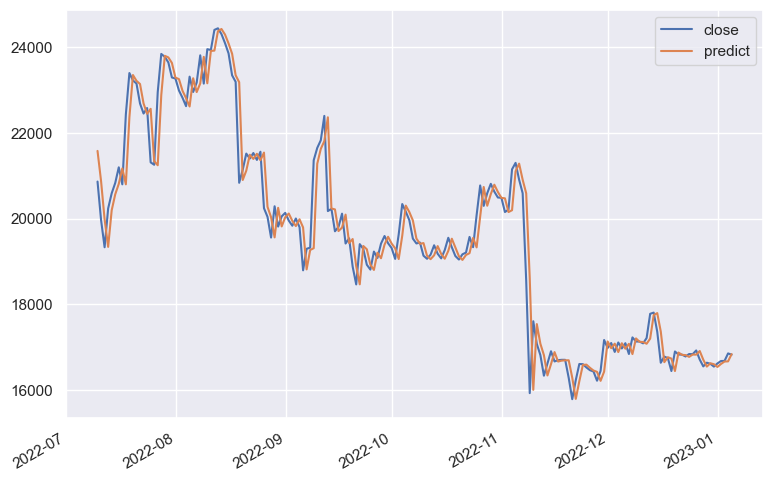

In [25]:
btc_close.iloc[-180:][['close','predict']].plot()

accuracy of predictons

In [26]:
btc_close['difference'] = btc_close['predict'] - btc_close['close']
btc_close.head()

,close,lag_1,lag_2,predict,difference
2017-08-18 20:00:00,4139.98,4108.37,4285.08,4111.676886,-28.303114
2017-08-19 20:00:00,4086.29,4139.98,4108.37,4136.373785,50.083785
2017-08-20 20:00:00,4016.00,4086.29,4139.98,4085.539665,69.539665
2017-08-21 20:00:00,4040.00,4016.00,4086.29,4015.842446,-24.157554
2017-08-22 20:00:00,4114.01,4040.00,4016.00,4036.707438,-77.302562


<AxesSubplot:>

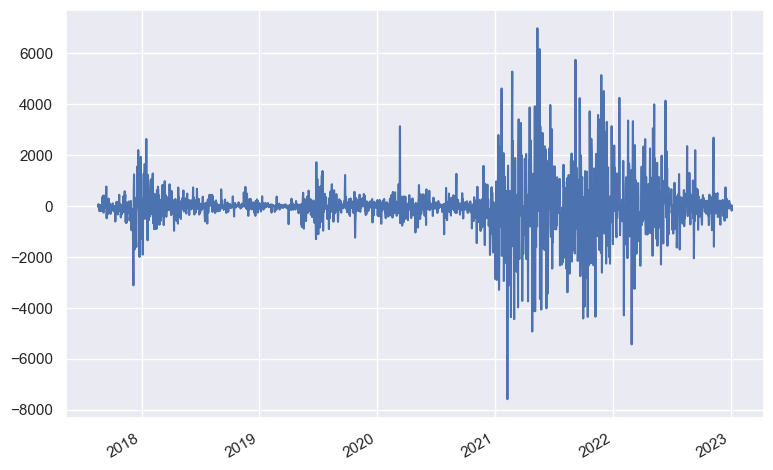

In [27]:
btc_close['difference'].plot()

In [28]:
btc_close['% error'] = (abs(btc_close['difference']*100)) / btc_close['close']
btc_close.head()

,close,lag_1,lag_2,predict,difference,% error
2017-08-18 20:00:00,4139.98,4108.37,4285.08,4111.676886,-28.303114,0.683653
2017-08-19 20:00:00,4086.29,4139.98,4108.37,4136.373785,50.083785,1.225654
2017-08-20 20:00:00,4016.00,4086.29,4139.98,4085.539665,69.539665,1.731565
2017-08-21 20:00:00,4040.00,4016.00,4086.29,4015.842446,-24.157554,0.597959
2017-08-22 20:00:00,4114.01,4040.00,4016.00,4036.707438,-77.302562,1.879008


<AxesSubplot:>

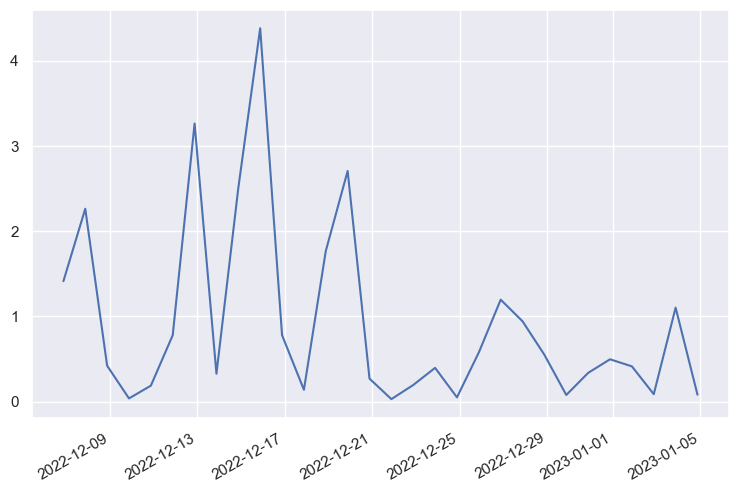

In [29]:
btc_close.iloc[-30:]['% error'].plot()

In [30]:
btc_close.iloc[-1]

close         16820.510000
lag_1         16850.360000
lag_2         16675.180000
predict       16834.142667
difference       13.632667
% error           0.081048
Name: 2023-01-04 21:00:00, dtype: float64